# Fast.ai Lessons 9 Roundup
- categories: [Fast.ai2]

# Lesson Overview
Runthrough stable diffusion, then detail behind how it works. There will be some handwaving for a few lessons, because it will take multiple lessons to learn it all from scratch. The point is, we want to build intuition first and see the full picture then narrow into the details as needed.
Jeremy said he expects people to spend on average, 10 hours a lesson.
- This lesson is 3 lessons. This general video, a deeper code dive called lesson 1A, and another for the maths.

# The topics covered, briefly


# Lecture Notes
- GPU needs have increased for this course. Google collab pricing has increased. Maybe use my laptop GPU or the uni one. The four options: Colab, Paperspace Gradient, Lambda Labs, Jarvis Labs. Lambda GPU offer:$1.10/hour. Lambda is cheaper than everything else but it nor collab allow you to pause. This can change again too. Funnily enough, collab is skyrocking in price because everyone is using it for stable diffusion. 
- Training GPUs need 16/24 gb. My laptop is only 12gb, and it's probably not simple to optimise it for ML. I might be able to do everything that isn't training on my PC.
- Probably should join/create a study group to enjoy the course more.
- This course covers details you need to know to be a researcher or custom setup for industry. 
- Stable diffusion is moving so quickly, the details change. Literally in the last 24hrs, 2 important new papers came out. The number of steps has gone down from from 250 from 1000! And something else changed to make it 10x-20x faster! I wonder if this is a result directly from SD's open source nature. The research community may well be able to improve SD much faster then say OpenAi can improve DALL-E.
- But after this first lesson, we go into the foundations which won't change, so the research update details won't be hard to understand.
- We can fine-tune SD using dreambooth, to put any object or person into an image! strmr.com is a service to do so!
- Diffusion-nbs notebook and repo. It contains many things to play with and then understand what's possible. It's worth testing it. There's notebooks with tons of parameters we don't get understand yet. I think this is the philosophy that, to understand a black box we should first get intuition for it's inputs and outputs, then kneed into the details. 
- It's not actually easy to know what prompts to give SD. The best way to learn is to look at other people's prompts and outputs lexica.art gives plenty examples.
- First start by cloning Stable Diffusion notebook.
- Diffusers is the HuggingFace module for this. HuggingFace has had really good packages for a while now.
- We use the SD pipeline. A pipeline is similar to a fast.ai learner. It does many things automatically. We can save pipelines like we save learners. We can also save pipelines and upload them into HuggingFace's cloud server. Like this, we can browse and download pipeline's from HuggingFace, and also upload our own and share them. 
- If we use paperspace or lambda, the pipeline we downloaded will be saved, but if we use collab then no.
- If we use the same pipeline with the same random seed, we get the same result. 
- Generally, diffusion works as follows: we start with random noise, and each step we get slightly less noisy and towards the result we want, through many steps, e.g. 51. Although after yesterday it's now 3-4...
- Why don't we just do it in one step? Our models aren't smart enough, but considering it's not 3-4 steps from 1000, maybe they will be.
- The exact same prompt, four times, we pass them into the pipeline. The pipeline has a variable, guidance_scale: 'to what degree should we focus on the caption versus just creating the image'.
- Too low guidance won't make images of the prompt, too high could be strange depending on the implementation of SD.
- It works by making an image without g, then image with g, and find the average of it. 
- Negative prompts are similar. Make two images, and subtract one from another. Say we want to remove blue from the image. Subtract a prompt blue from it.
- Passing images into SD instead of prompts: We use image to image pipelines. Instead of starting diffusion with random noise from scratch, it starts with a noisy version of the input image, using it as a guiding point. It uses a parameter strength, which is similar to g I think, how strongly to follow the image.
- New technique: Let's take an image and pass it into SD, then pass the resulting image into SD again! We can use this to change styles of images for example!
- Fine-tuning: We take the models in the pipeline and pass it our own images and captions. Lambdalabs have a blog post guide for it.
- Specical kind of fine-tuning: textual inversion. We find tune a single embedding. Create a new embedding for some concept images we want. E.g. 'watercolour', and add that token to the text model, and train embeddings for it using our images. Then we can have a prompt "Woman in the style of <watercolour>".
- Dreambooth is similar to textual inversion. It finds a existing token in the embeddings that is barely used, instead of making a new one, and fine tunes it. 
- Not sure why/if Textual inversion or Dreambooth is better.
- Textual inversion example: trying to get a teady bear to ride a horse. It never ended up generating it. It was able to get teady to sit on a carpet though. The first example shows how it can fail sometimes.
- The way SD is normally explained is focussed on a maths derivation, but fastai has a new way to think about it. It's mathematically equivilent, but conceptually much simpler. 
- Imagine that we wanted to generate hand written digits using SD. Start by assuming there's some web service that takes an image,X1, and returns the probability that it's a handwritten digit, P(X1).
- We get various probabilities returned from our service. Say 0.98, 0.4, 0.02.
- Let's call our web service a function f instead.
- We can use f to generate handwritten digits! We use a function that can take an image and return the probability that it's an image, to generate new images of handwritten digits.
- Imagine we had a mess of an image that is supposed to be an handwritten digit. It's 28x28, 784 px. We pick one of these pixels, and make it a little bit lighter or darker. We then pass it into f and see how the probability changes. If it increases, then we've gotten something that's more like a digit. If we do this enough times for every pixel, then we could possibly create an image of a digit from noise!
- We should optimise this by finding the gradient of the probability that our mess, X, is a digit, w.r.t the gradient of X's pixels. How much does the probability X is a digit increase as we increase pixel values. Our gradient will have 784 values, one for each pixel.
- Then we change the image pixels using this gradient. Take every pixel and subtract it by it's gradient w.r.t the probability (multiplied by a learning rate, C, I suppose). 
- Finite differicing method of differencing: the method if we did found the deriviate 784 times for each pixel. But we need not to this, it's slow, use f.backward() in Python to use analytics derivatives to do it super quick. X.grad from f.backward() is all the gradients we need.
- Repeat X + C*(Gradient) enough times to get our result.
- How do we get f? It's just a neural net model, isn't this just a problem we've already solved in the last course. 
- We could get training data, we need bad data that isn't as much a digit. We can get these bad images, and try and predict how much it is the proper clean digit and how much of it is noise:

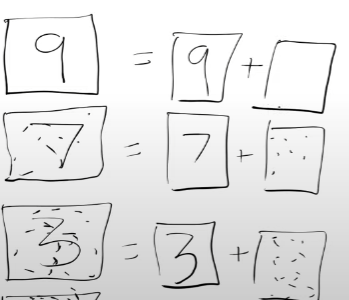- 

- Something with a lot of noise isn't like a digit, something with little noise is not.
- Create a neural net. Instead of worrying about the specific network, think about them as something that has some inputs, some outputs, and some loss function that takes both, and it's deriviate is used to update the neural net weights. 
- The inputs to our model is 
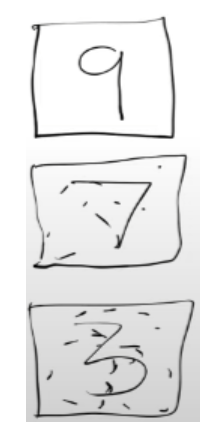

our outputs are how much noise, or the actual noise image itself, on the right:
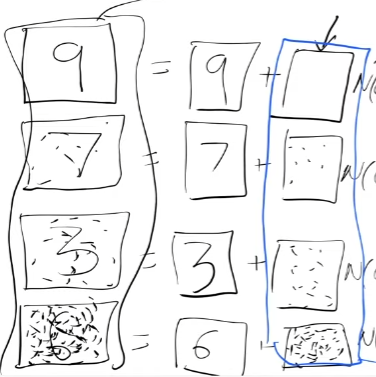


We want to predict the mean and variance of each noisy part.
We use MSE as our loss function.
MSE means that we have noisy digit inputs imaes, and output images which are noise images.
This is just jumping right to a SD goal we did earlier!
But wait, the noise in an image is the same as in SD, the gradient of the probability that it's an image w.r.t the pixel change.
Intuitively, if we know the noise, then we can simply go in the background direction to remove it.
In simplier terms:XX

In total for SD:
Take an image of pure noise and pass it into our nnet. It returns info about what parts it thinks it's noise and what parts it thinks it's a digit. Like, 'if we left behind these pixels that aren't noise, it would look a little bit more than an image'. If we keep doing this then we'd just get a handwritten digit eventually!
In practice, for now, for use a unet as our nnet. 
The details for now will be skipped. For a unet, it takes a somewhat noisy image as input, and outputs the noise. The noise such that, if we subtract the input by output, we get a (more) unnoisy image.
The issue is we have 784 pixels. In practice we'd be passing in images with tons of pixels. 512x512x3 =  786432 px!

# Questions


# Links
- As I am doing this lesson as it is released privately in real time, I cannot share the lesson link.